<a href="https://colab.research.google.com/github/vubanc/BikeAllocationOptimization/blob/main/TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Libraries and Notebooks**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Work/Bikesharing/CombinedRentals_AllStations.csv")
df.head(2)

,index,id,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,kilometers,miles,message_count,type,duration (seconds),rating,device_id,bike_type,Date
0,1,34ac1576-891f-4aca-a570-31db6160fd6f,Dara Ochoa,2112677d-b644-4cb8-866d-58f52b932f76,14792852353,Riverfront Park,2023-08-02 01:09:31.952446+00:00,2023-08-01 19:09:31.952446-06:00,Riverfront Park,2023-08-02 01:10:19.952446+00:00,2023-08-01 19:10:19.952446-06:00,NaN,NaN,130,22,48.0,NaN,74164be4e769c0ff30f08acb19724fa186d89b71913e9b...,Regular Bike,2023-08-01
1,2,dc96b3e6-f607-452b-ad18-79ea96e033d9,Gervon Pennington,79ea58b0-0988-47da-b963-a11a52a94f04,19035560048,Riverfront Park,2023-08-02 00:48:53.349677+00:00,2023-08-01 18:48:53.349677-06:00,Riverfront Park,2023-08-02 01:24:14.349677+00:00,2023-08-01 19:24:14.349677-06:00,4.482,2.78498,41,22,2121.0,NaN,fMV1Kdc8Km,Regular Bike,2023-08-01


## **Exploratory Data Analysis**

In [4]:
min_date = df.Date.min()
max_date = df.Date.max()
dates = pd.DataFrame(pd.date_range(start=min_date, end=max_date))
dates.rename(columns={0:"Date"}, inplace=True)
dates.Date = dates.Date.dt.strftime("%Y-%m-%d")
df = pd.merge(df, dates, how="right", on="Date")
df.sort_values(by = ["Date", "start_time"], inplace=True, ascending=[True,True])
df_tripCount = df.groupby("Date", as_index=False)["id"].count()
df_tripCount.rename(columns={"id":"trip_count"}, inplace=True)
df_tripCount.Date = pd.to_datetime(df_tripCount.Date)
df_tripCount.set_index("Date")

,trip_count
Date,
2022-05-02,2
2022-05-03,14
2022-05-04,7
2022-05-05,6
2022-05-06,9
...,...
2023-07-28,1
2023-07-29,19
2023-07-30,22


Trend

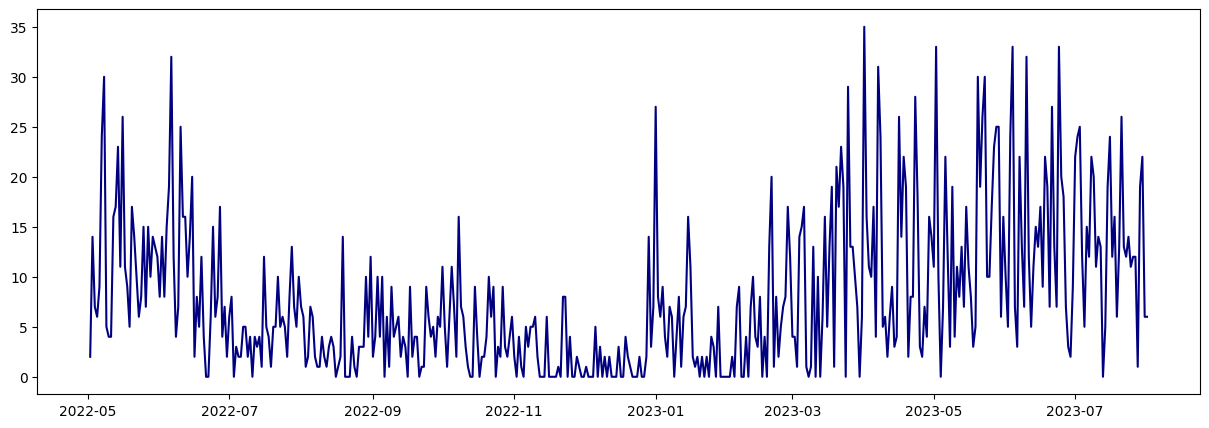

In [5]:
fig, axs = plt.subplots(1,1, figsize=(15,5))
plt.plot(df_tripCount['Date'], df_tripCount['trip_count'], color="navy")

Autocorrelation

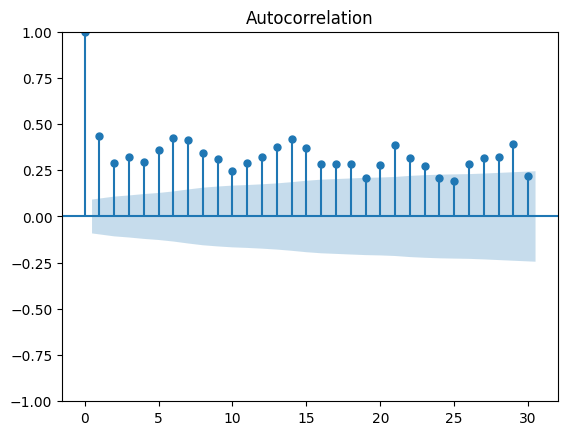

In [6]:
#Autocorrelation
acf_plot = plot_acf(df_tripCount.trip_count, lags=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


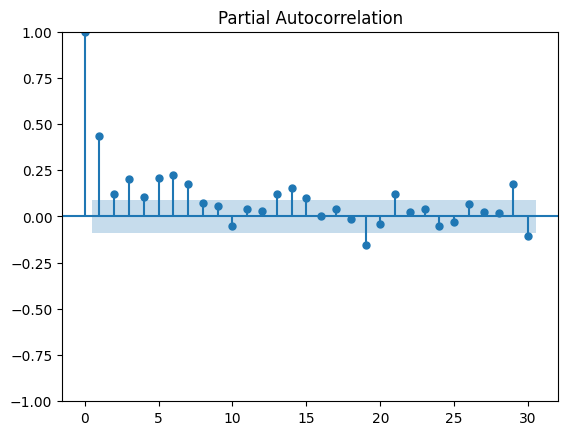

In [7]:
#Partial autocorrelation
pacf_plot = plot_pacf(df_tripCount.trip_count, lags=30)

Stationarity

In [31]:
print(f"Global Mean: {df_tripCount.trip_count.mean()}")
print(f"Global Mean: {df_tripCount[250:].trip_count.mean()}")

Global Mean: 7.899343544857768
Global Mean: 10.734299516908212


In [32]:
df_tripCount["lagged_trip_count"] = df_tripCount["trip_count"].shift(1)
df_tripCount["diff_trip_count"] = df_tripCount["trip_count"] - df_tripCount["lagged_trip_count"]
df_tripCount.fillna(0,inplace=True)
df_tripCount["lagged_trip_count"] = df_tripCount["lagged_trip_count"].astype(int)
df_tripCount["diff_trip_count"] = df_tripCount["diff_trip_count"].astype(int)

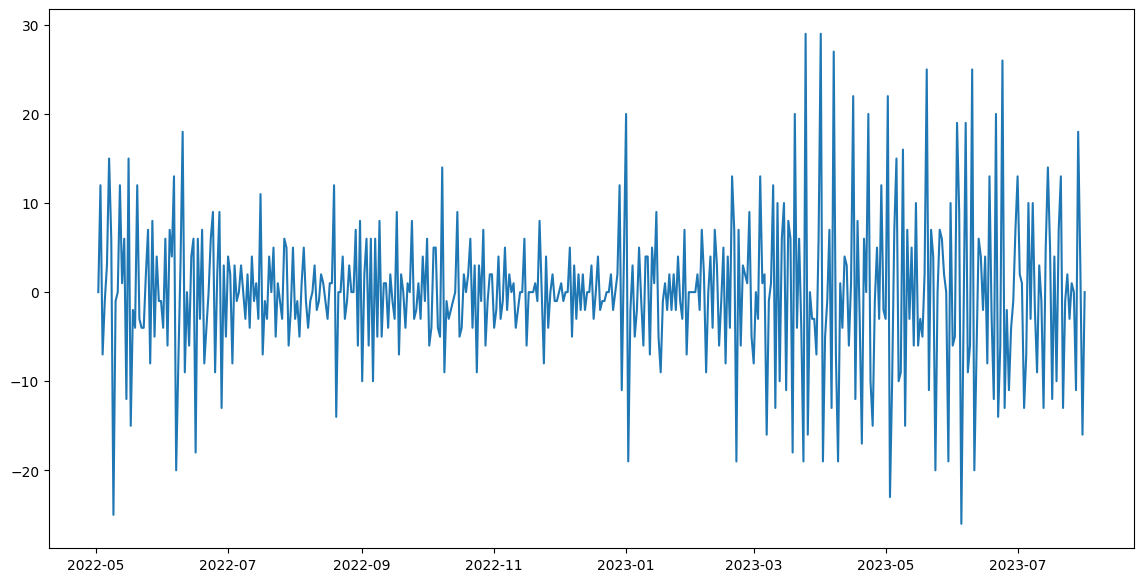

In [33]:
#Applying a Transformation
fig = plt.figure(figsize=(14,7))
plt.plot(df_tripCount.Date, df_tripCount.diff_trip_count)

In [34]:
df_tripCount

,Date,trip_count,lagged_trip_count,diff_trip_count
0,2022-05-02,2,0,0
1,2022-05-03,14,2,12
2,2022-05-04,7,14,-7
3,2022-05-05,6,7,-1
4,2022-05-06,9,6,3
...,...,...,...,...
452,2023-07-28,1,12,-11
453,2023-07-29,19,1,18
454,2023-07-30,22,19,3
455,2023-07-31,6,22,-16
